# Run a batch of samples

In [ ]:
!conda list | grep covid19sim

In [ ]:
#!ansible-playbook /src/ansible/playbooks/covid19sim.yml

In [ ]:
!ls -ltr params

In [ ]:
!ls /COVI-AgentSim/src/covid19sim/configs/simulation/region

I had uploaded the latest and greatest draft parameter file to a github repo. Maybe could have pulled it directoy from kingston-params repo (if I had saved it there--maybe a better place to save versions of parameter sets for the moment than directly in the experiment repo)

In [ ]:
!cp params/kingston_0xdfc056a4fdb804e60e964b2cc5aae6ea.yml /COVI-AgentSim/src/covid19sim/configs/simulation/region/kingston0xdfc056a4fdb804e60e964b2cc5aae6ea.yaml

In [ ]:
!ls /COVI-AgentSim/src/covid19sim/configs/simulation/region

In [ ]:
!ls -ltr /src/experiments/validation/results/data

In [65]:
from numpy.random import default_rng

rng = default_rng()

seed_list = [rng.integers(low=0, high=1e4) for _ in range(8)]

len(seed_list), seed_list[0:10]

(8, [2991, 2274, 831, 4531, 742, 6003, 6612, 3943])

In [66]:
import numpy as np

len(np.unique(seed_list))

8

In [ ]:
!conda install pandas -y

In [ ]:
!conda install jupyter -y

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

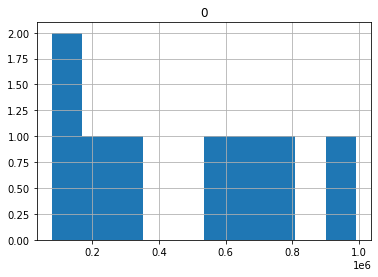

In [3]:
import pandas as pd

pd.DataFrame(seed_list).hist()

In [29]:
args_dict = {'region': 'kingston0xdfc056a4fdb804e60e964b2cc5aae6ea',
        'n_people': 3000,
        'simulation_days': 60,
        'init_fraction_sick': 0.002,
        'N_BEHAVIOR_LEVELS': 2,
        'intervention': 'no_intervention',
        'tune': True,
        'track': 'light',
        'GLOBAL_MOBILITY_SCALING_FACTOR': 0.85,
        'APP_UPTAKE': -1,
        'USE_INFERENCE_SERVER': False,
        'outdir': '/src/experiments/validation/results/data',
        'INTERVENTION_DAY': -1}
args_dict

{'region': 'kingston0xdfc056a4fdb804e60e964b2cc5aae6ea',
 'n_people': 3000,
 'simulation_days': 60,
 'init_fraction_sick': 0.002,
 'N_BEHAVIOR_LEVELS': 2,
 'intervention': 'no_intervention',
 'tune': True,
 'track': 'light',
 'GLOBAL_MOBILITY_SCALING_FACTOR': 0.85,
 'APP_UPTAKE': -1,
 'USE_INFERENCE_SERVER': False,
 'outdir': '/src/experiments/validation/results/data',
 'INTERVENTION_DAY': -1}

In [30]:
args_str = ' '.join([f'{k}={v}' for k, v in args_dict.items()])
args_str

'region=kingston0xdfc056a4fdb804e60e964b2cc5aae6ea n_people=3000 simulation_days=60 init_fraction_sick=0.002 N_BEHAVIOR_LEVELS=2 intervention=no_intervention tune=True track=light GLOBAL_MOBILITY_SCALING_FACTOR=0.85 APP_UPTAKE=-1 USE_INFERENCE_SERVER=False outdir=/src/experiments/validation/results/data INTERVENTION_DAY=-1'

In [31]:
!python /COVI-AgentSim/src/covid19sim/run.py region=kingston0xdfc056a4fdb804e60e964b2cc5aae6ea.yaml n_people=3000 simulation_days=60 init_fraction_sick=0.002 N_BEHAVIOR_LEVELS=2 intervention=no_intervention tune=True track=light seed=1508 GLOBAL_MOBILITY_SCALING_FACTOR=0.85 APP_UPTAKE=-1 USE_INFERENCE_SERVER=False outdir=/src/experiments/validation/results/data INTERVENTION_DAY=-1

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 1508
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
^C


In [76]:
args_list = [f'python /COVI-AgentSim/src/covid19sim/run.py seed={s} {args_str}\n' for s in seed_list]
args_list

['python /COVI-AgentSim/src/covid19sim/run.py seed=2991 region=kingston0xdfc056a4fdb804e60e964b2cc5aae6ea n_people=3000 simulation_days=60 init_fraction_sick=0.002 N_BEHAVIOR_LEVELS=2 intervention=no_intervention tune=True track=light GLOBAL_MOBILITY_SCALING_FACTOR=0.85 APP_UPTAKE=-1 USE_INFERENCE_SERVER=False outdir=/src/experiments/validation/results/data INTERVENTION_DAY=-1\n',
 'python /COVI-AgentSim/src/covid19sim/run.py seed=2274 region=kingston0xdfc056a4fdb804e60e964b2cc5aae6ea n_people=3000 simulation_days=60 init_fraction_sick=0.002 N_BEHAVIOR_LEVELS=2 intervention=no_intervention tune=True track=light GLOBAL_MOBILITY_SCALING_FACTOR=0.85 APP_UPTAKE=-1 USE_INFERENCE_SERVER=False outdir=/src/experiments/validation/results/data INTERVENTION_DAY=-1\n',
 'python /COVI-AgentSim/src/covid19sim/run.py seed=831 region=kingston0xdfc056a4fdb804e60e964b2cc5aae6ea n_people=3000 simulation_days=60 init_fraction_sick=0.002 N_BEHAVIOR_LEVELS=2 intervention=no_intervention tune=True track=ligh

In [77]:
!rm val-1.cmd

In [78]:
with open('val-1.cmd', 'w') as arg_file:
    arg_file.writelines(args_list)

In [79]:
!wc -l val-1.cmd

8 val-1.cmd


In [80]:
!cat val-1.cmd | parallel -j 4

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 2274
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 6 
Preparing schedule ... 
Schedule prepared (Took 326.215s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.464 (43.1),

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 2991
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 1 
Preparing schedule ... 
Schedule prepared (Took 320.658s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.497 (43.1),

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 4531
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 314.128s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.388 (43.1),

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 831
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 310.869s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.578 (43.1), 

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 6003
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 42.401s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.548 (43.1), 

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 6612
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 41.937s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.454 (43.1), 

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 742
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 35.042s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.449 (43.1), m

RISK_MODEL = 
INTERVENTION_DAY = -1
seed: 3943
Type of run: UNMITIGATED
Initializing humans ...
Allocating houses ... 
expanding the search for kids to middle generation for census family households
Housing allocated with failed attempts: 0 
Preparing schedule ... 
Schedule prepared (Took 45.613s)
Computing their preferences

######## SIMULATOR KNOBS #########
HOUSEHOLD_ASSORTATIVITY_STRENGTH: 0.5
WORKPLACE_ASSORTATIVITY_STRENGTH: 5
P_INVITATION_ACCEPTANCE: 0.5
BEGIN_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
END_PREFERENTIAL_ATTACHMENT_FACTOR: 0.5
P_HOUSE_OVER_MISC_FOR_SOCIALS: 0.5
CONTAGION_KNOB: 25
ENVIRONMENTAL_INFECTION_KNOB: 0.0017
TIME_SPENT_SCALE_FACTOR_FOR_SHORT_ACTIVITIES: 1.5
TIME_SPENT_SCALE_FACTOR_FOR_WORK: 1.0
TIME_SPENT_SCALE_FACTOR_SLEEP_AWAKE: 0.01
GLOBAL_MOBILITY_SCALING_FACTOR: 0.85

######## DEMOGRAPHICS / SYNTHETIC POPULATION #########
NB: (i) census numbers are in brackets. (ii)  (**#@#**)  marks a 25 % realtive deviation from census

Age (census) - mean: 43.471 (43.1), 

In [81]:
!ls /src/experiments/validation/results/data

sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1508_20210701-153833_141200
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1508_20210702-181737_613900
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-2274_20210702-193149_890500
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-2991_20210702-193149_252600
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-3943_20210702-195723_214000
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-4531_20210702-193149_469900
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-6003_20210702-195522_737400
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-603546_20210702-181939_770100
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-6612_20210702-195656_016400
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-742_20210702-195504_171700
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-831_20210702-193149_142000


In [ ]:
import pickle

file_name = '/src/experiments/validation/results/data/sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1508_20210701-153833_141200/tracker_data_n_3000_seed_1508_20210701-154653.pkl'
with open(file_name, 'rb') as results_file:
    tracker = pickle.load(results_file)
tracker.keys()